In [1]:
import sys
from pathlib import Path
src_utils_path = Path("../../src/utils")
sys.path.append(str(src_utils_path))
import metrics as mjo
import yaml  

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import numpy as np
import xarray as xr 

In [2]:
lat_range = 20
lead = 35
memory_last = 0

with open('./best_config.yaml', 'r') as file:
    config = yaml.safe_load(file)

output_path = config['prediction_save_path']

fn_list = []

import re

for exp_num in range(1, 17):
    fn = re.sub(r"exp\d+/", f"exp{exp_num}/", output_path)
    fn_list.append(fn)

bcc, rmse = mjo.get_skill_all_leads_parallel(
    'ROMI',
    fn_list=fn_list,
    rule='Iamp>1.0',
    month_list=None,
    datesta='2016-01-01',
    dateend='2021-12-31',
    lead_max=lead,
    exp_list=np.arange(1, 5),
    Fnmjo=config["data"]["target_path"]
)

# bccv, rmsev = mjo.get_skill_all_leads_parallel(
#     'ROMI',
#     fn_list=fn_list,
#     rule='Iamp>1.0',
#     month_list=None,
#     datesta='2010-01-01',
#     dateend='2015-12-31',
#     lead_max=lead,
#     exp_list=np.arange(1, 5),
#     Fnmjo=config["data"]["target_path"]
# )

In [8]:
bcc_ens, _ = mjo.get_skill_all_leads_ensemble_mean(
    fn_list=fn_list,
    exp_num_list=np.arange(1, 17),
    lat_lim=20,
    Fnmjo=config["data"]["target_path"]
)

In [5]:
bccs = []
# bccvs = []
for exp_num in range(1, 5):
    bccs.append(bcc[exp_num])
    # bccvs.append(bccv[exp_num])

bccs = np.array(bccs)
# bccvs = np.array(bccvs)


In [9]:
bcc_ens

array([0.85491014, 0.8504872 , 0.8394679 , 0.82143885, 0.79659826,
       0.76744217, 0.7426279 , 0.72287357, 0.7057426 , 0.69139355,
       0.6779792 , 0.66651887, 0.6548627 , 0.6432554 , 0.63374966,
       0.6240533 , 0.6153594 , 0.60637695, 0.59690857, 0.5850659 ,
       0.57074726, 0.55564755, 0.53996265, 0.5245795 , 0.506361  ,
       0.49350244, 0.4809364 , 0.46755853, 0.45383772, 0.44586357,
       0.43668452, 0.42682666, 0.41532156, 0.4045134 , 0.39125293,
       0.37612027], dtype=float32)

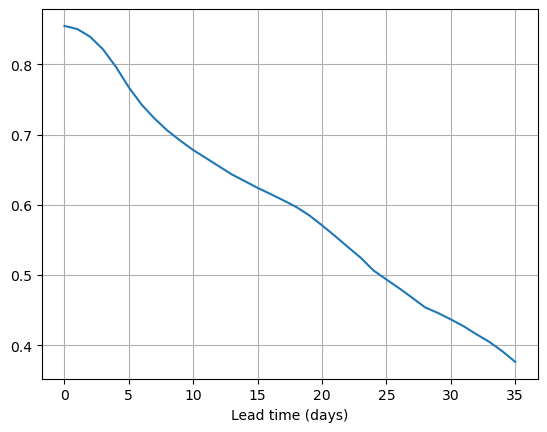

In [10]:
plt.plot(np.arange(lead+1), bcc_ens.T, linestyle='-')
# plt.plot(np.arange(lead+1), bccvs.T, linestyle='--')

plt.xlabel('Lead time (days)')
plt.grid()

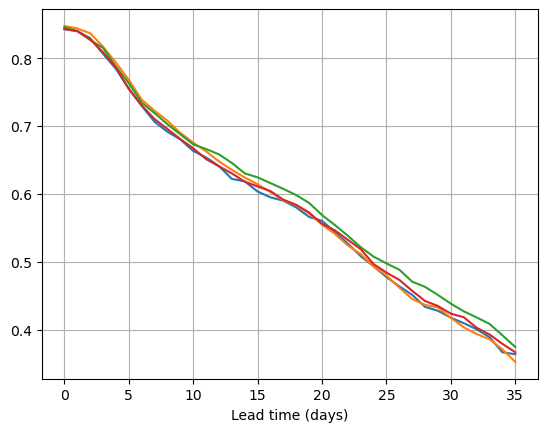

In [6]:
plt.plot(np.arange(lead+1), bccs.T, linestyle='-')
# plt.plot(np.arange(lead+1), bccvs.T, linestyle='--')

plt.xlabel('Lead time (days)')
plt.grid()